In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/gym_members_exercise_tracking.csv')

In [4]:
print("Dataset Information:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)

In [5]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
               Age Gender  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count   973.000000    973   973.000000   973.00000  973.000000  973.000000   
unique         NaN      2          NaN         NaN         NaN         NaN   
top            NaN   Male          NaN         NaN         NaN         NaN   
freq           NaN    511          NaN         NaN         NaN         NaN   
mean     38.683453    NaN    73.854676     1.72258  179.883864  143.766701   
std      12.180928    NaN    21.207500     0.12772   11.525686   14.345101   
min      18.000000    NaN    40.000000     1.50000  160.000000  120.000000   
25%      28.000000    NaN    58.100000     1.62000  170.000000  131.000000   
50%      40.000000    NaN    70.000000     1.71000  180.000000  143.000000   
75%      49.000000    NaN    86.000000     1.80000  190.000000  156.000000   
max      59.000000    NaN   129.900000     2.00000  199.000000  169.000000   

        Resting_BPM  Session_Duration (hou

In [6]:
categorical_columns = ['Gender', 'Workout_Type', 'Experience_Level']
for col in categorical_columns:
    print(f"\nUnique values in {col}: {df[col].unique()}")


Unique values in Gender: ['Male' 'Female']

Unique values in Workout_Type: ['Yoga' 'HIIT' 'Cardio' 'Strength']

Unique values in Experience_Level: [3 2 1]


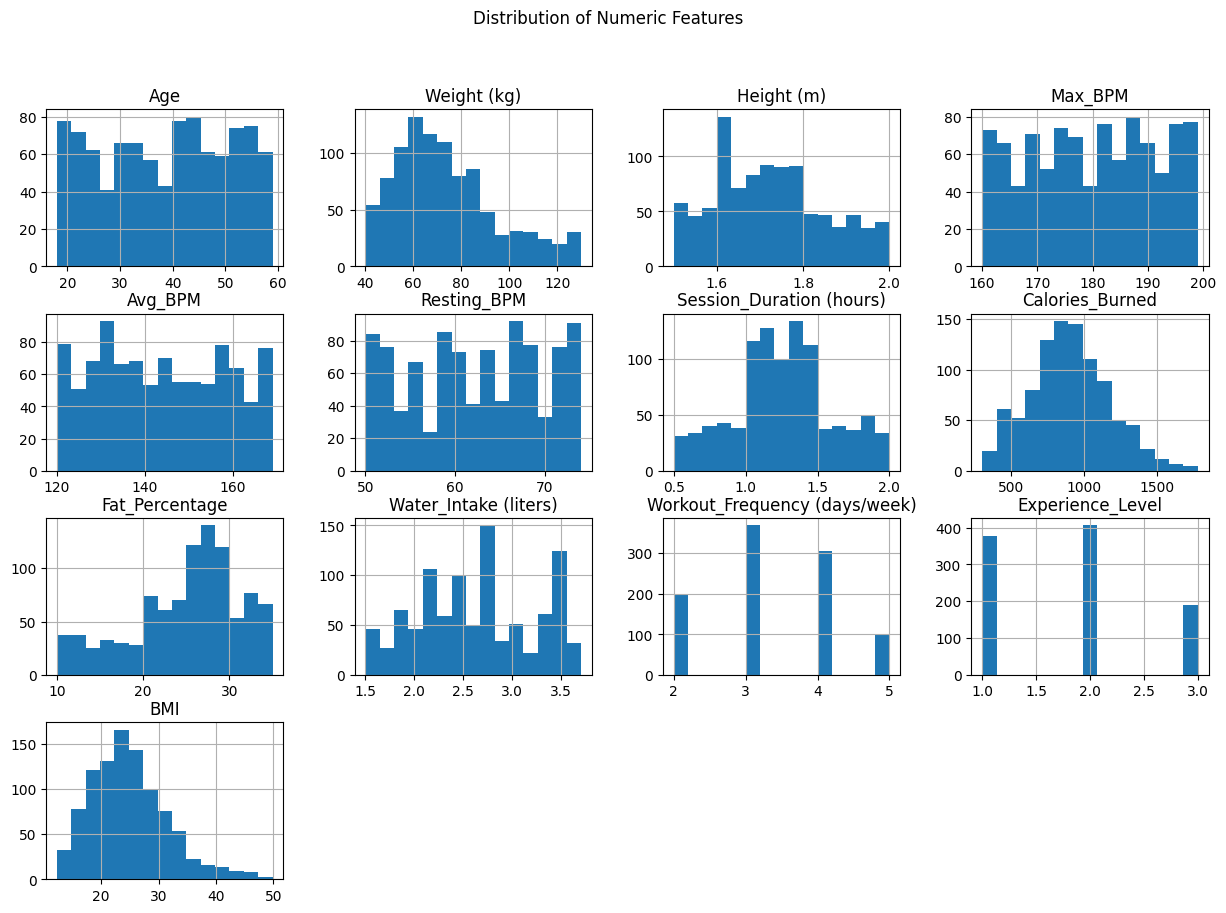

In [7]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle("Distribution of Numeric Features")
plt.show()

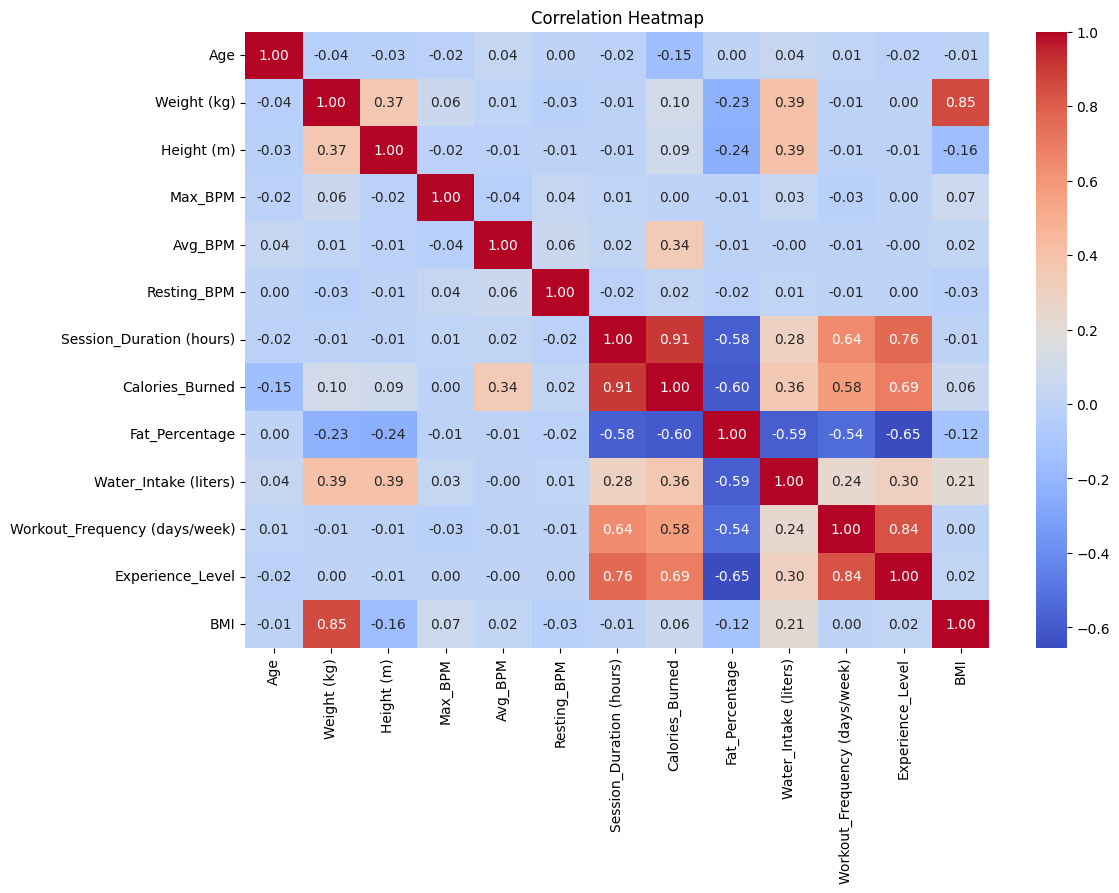

In [8]:
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

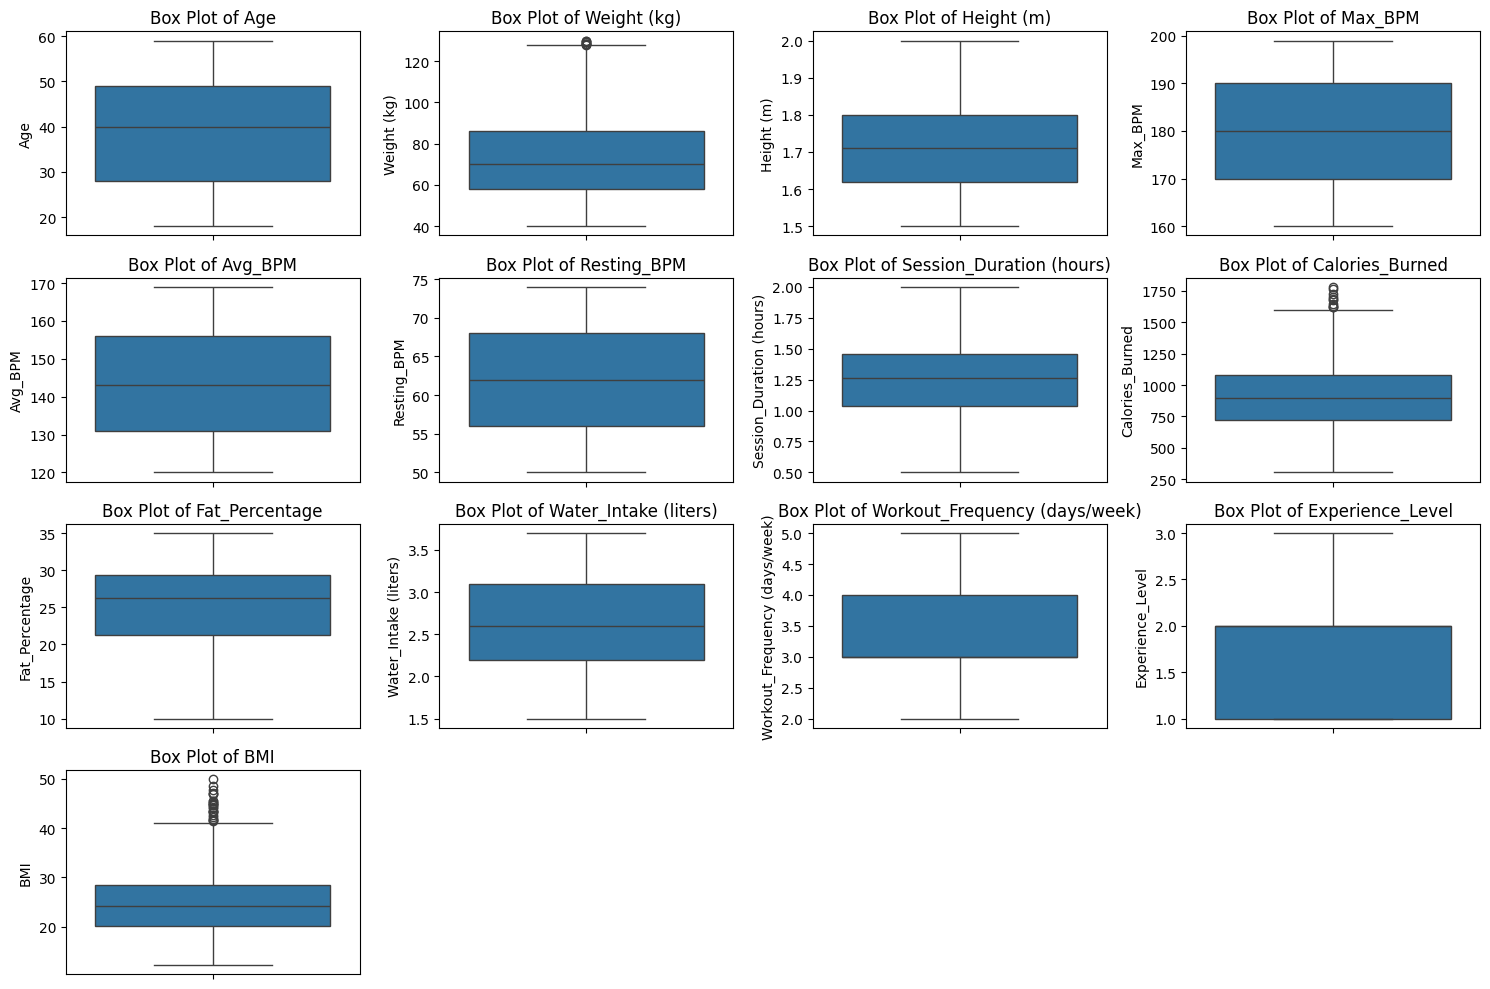

In [9]:
# Box plots to check for outliers in numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

In [10]:
# Detecting outliers using the IQR method
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Finding outliers
outliers = (df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))
print("Outliers in each column:")
print(outliers.sum())  # Shows the count of outliers in each column

Outliers in each column:
Age                               0
Weight (kg)                       9
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                  10
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                              25
dtype: int64


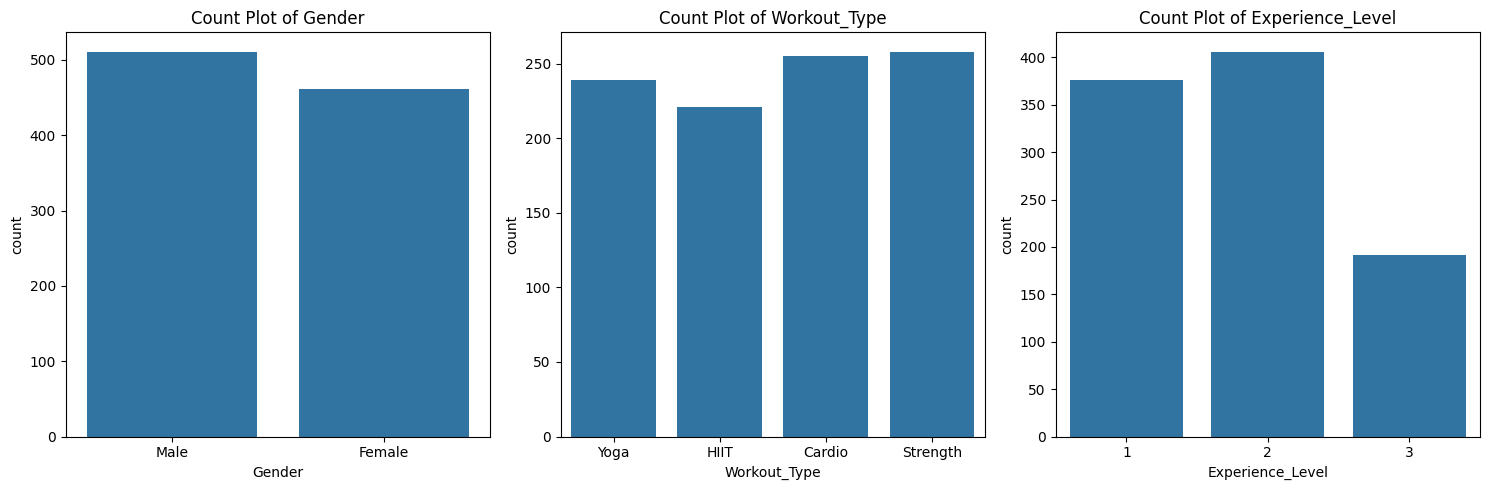

In [11]:
# Count plots for categorical variables
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

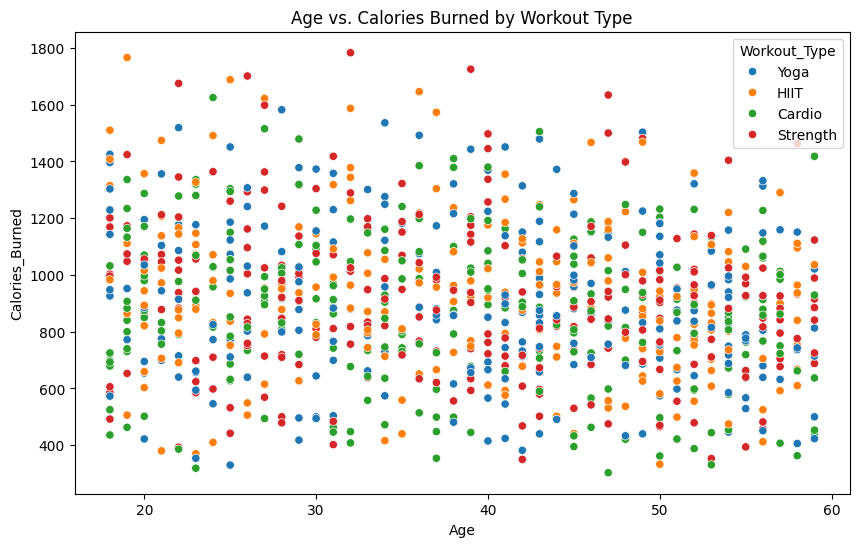

In [12]:
# Scatter plot for key variables (e.g., Age vs. Calories Burned)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Calories_Burned', hue='Workout_Type')
plt.title("Age vs. Calories Burned by Workout Type")
plt.show()

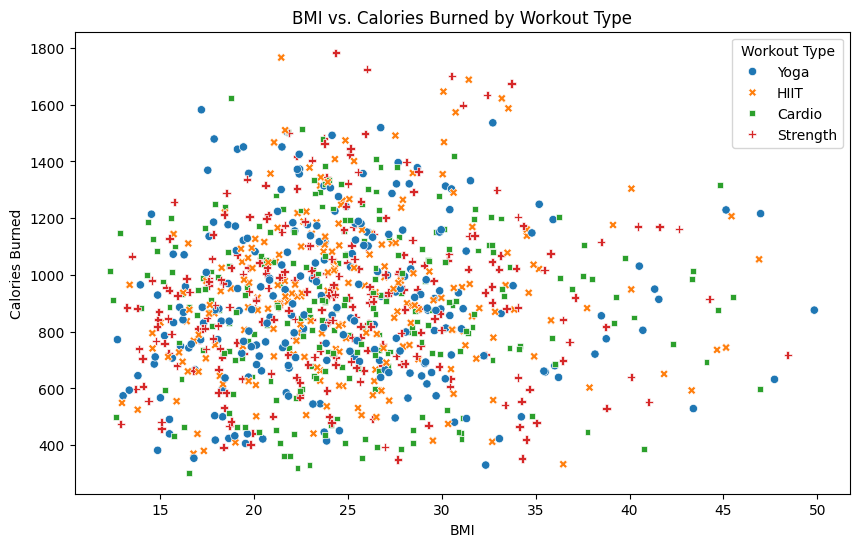

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of BMI vs. Calories Burned by Workout Type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='Calories_Burned', hue='Workout_Type', style='Workout_Type')
plt.title("BMI vs. Calories Burned by Workout Type")
plt.xlabel("BMI")
plt.ylabel("Calories Burned")
plt.legend(title="Workout Type")
plt.show()
